In [ ]:
!pip install opencv-python

# Google Drive 자료 접근하기

- `/content/drive/MyDrive` 경로에 나의 구글 드라이브 내 자료 접근 가능
- 추후 학습 데이터 등을 Google Drive에서 관리해두고, Google Colab session 할당 될 때 마다 동일 데이터 접근하여 사용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ! ls /content/drive/MyDrive

Mounted at /content/drive


In [ ]:
import cv2
cv2.__version__

import matplotlib.pyplot as plt
import numpy as np

# 이미지 읽기

`cv2.imread(fileName, flag)`
이미지 파일을 flag값에 따라서 읽어들입니다.

* Parameters:
  * fileName (str) – 이미지파일의 경로
  * flag (int) – 이미지 파일을 읽을 때의 Option.
* Returns:	image객체 행렬
* Return type:	numpy.ndarray

이미지 읽기의 flag는 3가지가 있습니다.

* `cv2.IMREAD_COLOR` : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.
* `cv2.IMREAD_GRAYSCALE` : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.
* `cv2.IMREAD_UNCHANGED` : 이미지파일을 alpha channel까지 포함하여 읽어 들입니다.

In [ ]:
cd/content/drive/MyDrive/Colab/study/metacode/creditcard/

shape :  (427, 640, 3)
ndim :  3
data dtype :  uint8
maximum value :  255
minimum value :  0


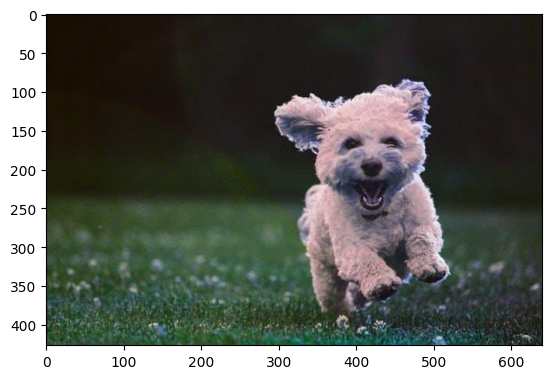

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab/study/metacode/얼굴인식/sample.jpg")

print("shape : ", img.shape)
print("ndim : ", img.ndim)
print("data dtype : ", img.dtype)
print("maximum value : ", img.max())
print("minimum value : ", img.min())

plt.imshow(img)
plt.show()

# Image Color sapces

- 기본으로 imread를 하면 BGR 포맷으로 이미지를 읽음
- OpenCV는 기본적으로 이미지를 다 BGR 포맷으로 다루고 있으나, 나머지 대부분의 라이브러리에서는 RGB로 이미지를 다루고 있기 때문에 주의!

- BGR로 읽어진 image를 RGB로 변경하기
- `cv2.cvtColor(img, cv2.COLOR_BRG2RGB)`
- `cv2.cvtColor(img, cv2.COLOR_BRG2GRAY)`
- `cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)`

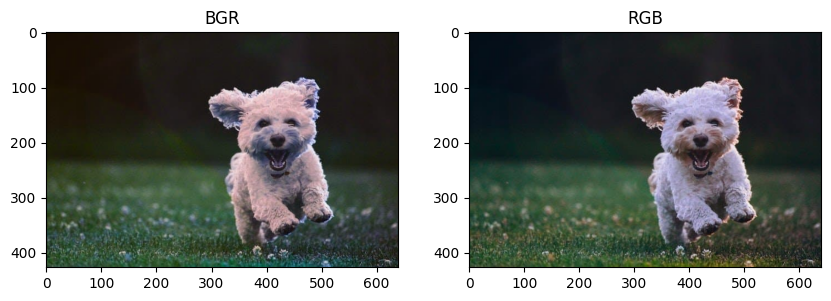

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].title.set_text('BGR')
axes[0].imshow(img)

axes[1].title.set_text('RGB')
axes[1].imshow(img_rgb)
plt.show()

# Image Resize

- 이미지의 크기를 바꾸기


`cv2.resize(img, dsize, fx, fy, interpolation)`

Parameters:
* img – Image
* dsize – Manual Size. 가로, 세로 형태의 tuple(ex; (100,200))
* fx – 가로 사이즈의 배수. 2배로 크게하려면 2. 반으로 줄이려면 0.5
* fy – 세로 사이즈의 배수
* interpolation – 보간법 (`cv2.INTER_LINEAR`, `cv2.INTER_CUBIC`, `cv2.NEAREST`)

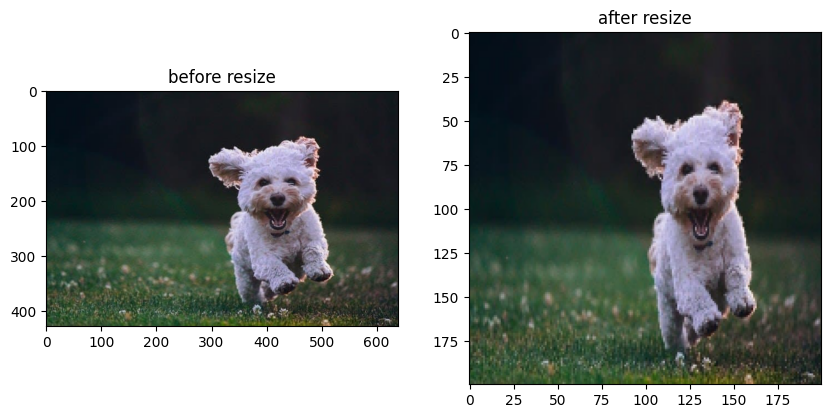

In [ ]:
img_resized = cv2.resize(img_rgb, (200, 200))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].title.set_text('before resize')
axes[0].imshow(img_rgb)

axes[1].title.set_text('after resize')
axes[1].imshow(img_resized)
plt.show()

# Image 편집

- array의 indexing & slicing 을 이용하여 이미지를 편집하거나 잘라내기 등을 수행할 수 있음

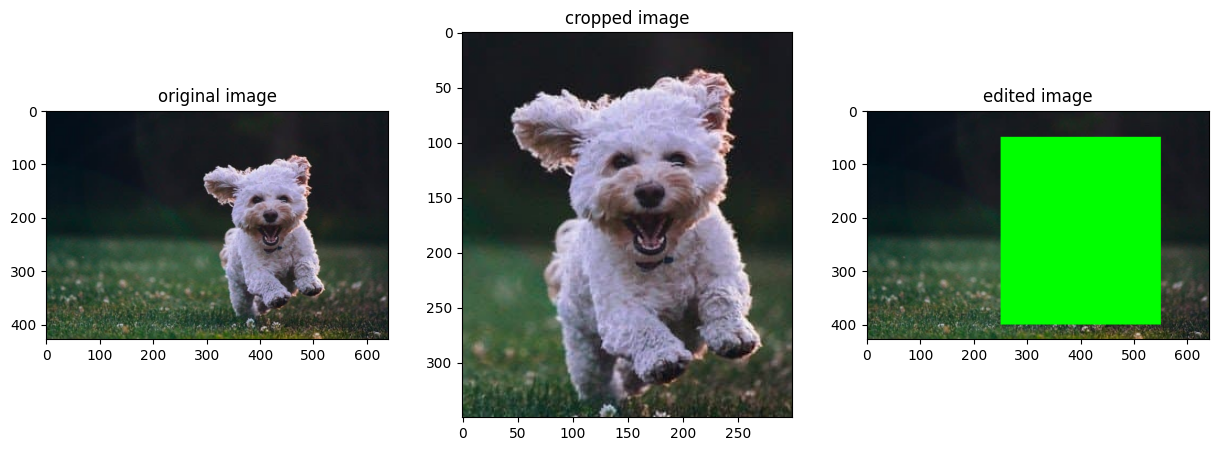

In [ ]:
x1, y1 = 250, 50
x2, y2 = 550, 400

img_cropped = img_rgb[y1:y2, x1:x2]

img_editied = img_rgb.copy()
img_editied[y1:y2, x1:x2] = [0, 255, 0] # make green

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].title.set_text('original image')
axes[0].imshow(img_rgb)

axes[1].title.set_text('cropped image')
axes[1].imshow(img_cropped)

axes[2].title.set_text('edited image')
axes[2].imshow(img_editied)
plt.show()

# 도형 그리기

## 사각형 그리기
`cv2.rectangle(img, start, end, color, thickness)`

Parameters:
* img – 그림을 그릴 이미지
* start – 시작 좌표(ex; (0,0))
* end – 종료 좌표(ex; (500. 500))
* color – BGR형태의 Color(ex; (255, 0, 0) -> Blue)
* thickness (int) – 선의 두께. pixel

## 원 그리기
`cv2.circle(img, center, radian, color, thickness)`

Parameters:
* img – 그림을 그릴 이미지
* center – 원의 중심 좌표(x, y)
* radian – 반지름
* color – BGR형태의 Color
* thickness – 선의 두께, -1 이면 원 안쪽을 채움


## 텍스트 추가
`cv2.putText(img, text, org, font, fontSacle, color)`

Parameters:
* img – image
* text – 표시할 문자열
* org – 문자열이 표시될 위치. 문자열의 bottom-left corner점
* font – font type. CV2.FONT_XXX
* fontSacle – Font Size
* color – fond color

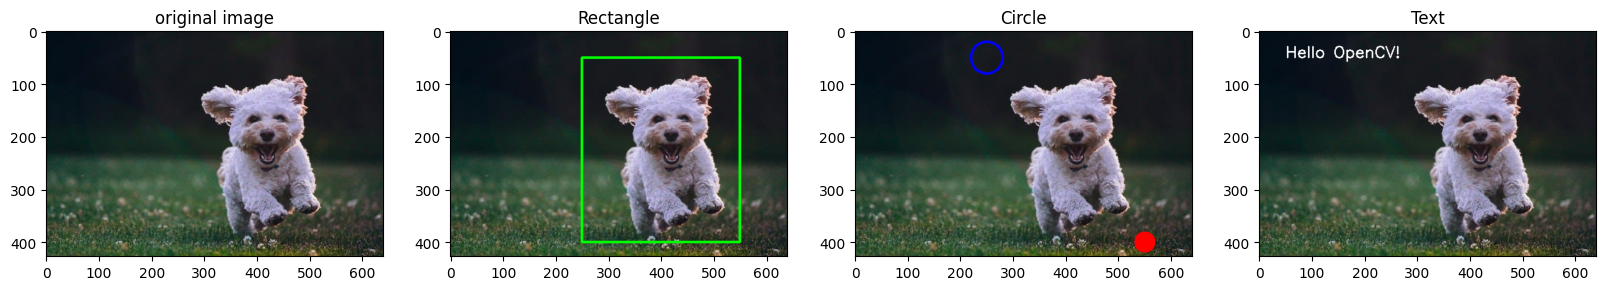

In [ ]:
x1, y1 = 250, 50
x2, y2 = 550, 400

img_rectangle = img_rgb.copy()
img_circle = img_rgb.copy()
img_text = img_rgb.copy()


cv2.rectangle(img_rectangle, (x1, y1), (x2, y2), (0, 255, 0), 3)

cv2.circle(img_circle, (x1, y1), 30, (0, 0, 255), 3)
cv2.circle(img_circle, (x2, y2), 20, (255, 0, 0), -1)

cv2.putText(img_text, 'Hello OpenCV!', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].title.set_text('original image')
axes[0].imshow(img_rgb)

axes[1].title.set_text('Rectangle')
axes[1].imshow(img_rectangle)

axes[2].title.set_text('Circle')
axes[2].imshow(img_circle)

axes[3].title.set_text('Text')
axes[3].imshow(img_text)
plt.show()

# Image save

`cv2.imwrite(fileName, image)`

image파일을 저장합니다.

Parameters:
* fileName (str) – 저장될 파일명
* image – 저장할 이미지

### 주의: image는 BRG 포맷이여야 제대로 저장됨

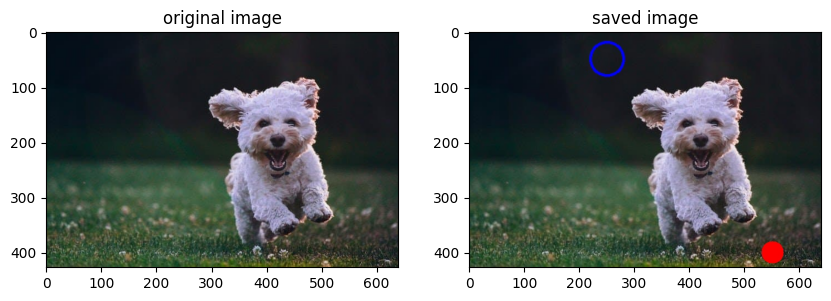

In [ ]:
img_save = cv2.cvtColor(img_circle, cv2.COLOR_RGB2BGR)

cv2.imwrite("/content/drive/MyDrive/Colab/study/metacode/얼굴인식/sample_save.jpg", img_save)


# verify
img = cv2.imread("/content/drive/MyDrive/Colab/study/metacode/얼굴인식/sample.jpg")
img_save = cv2.imread("/content/drive/MyDrive/Colab/study/metacode/얼굴인식/sample_save.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_save = cv2.cvtColor(img_save, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].title.set_text('original image')
axes[0].imshow(img)

axes[1].title.set_text('saved image')
axes[1].imshow(img_save)
plt.show()

# Pillow Library

* OpenCV와 마찬가지로 이미지 처리를 위한 라이브러리
* 기능 지원은 OpenCV가 더 많지만, Pillow는 주로 가벼운 느낌이며 Pytorch와의 호환이 잘되는 라이브러리
* OpenCV와 Pillow와의 Transform이 자유로워서 병행하여 사용할 수도 있음
* OpenCV는 numpy array형태로 이미지를 핸들링하고, BGR을 기본 포맷으로 하는 반면
* Pillow는 그들만의 이미지 객체를 사용하고 있고, RGB를 기본 포맷으로 사용

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427 at 0x791F645DE800>
(640, 427)
RGB


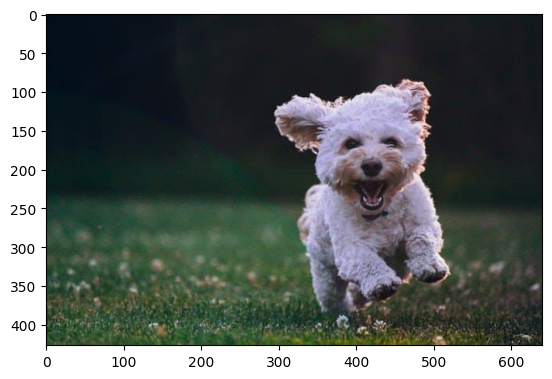

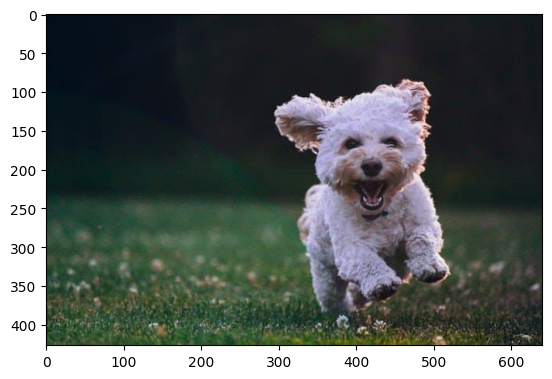

In [ ]:
from PIL import Image

img_pil = Image.open("/content/drive/MyDrive/Colab/study/metacode/얼굴인식/sample.jpg")
print(img_pil)
print(img_pil.size)
print(img_pil.mode)

img_numpy = np.array(img_pil) # PIL to numpy
plt.imshow(img_numpy)
plt.show()

img_pil = Image.fromarray(img_numpy) # numpy to PIL
plt.imshow(img_pil)
plt.show()
